In [9]:
#Importing the necessary libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Reading the data from the csv file

df = pd.read_csv('movies.csv')



In [10]:
# Checking the first 5 rows of the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [11]:
# Checking for missing data
for col in df.columns:
   pct_missing=np.mean(df[col].isnull())
   print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
# Data types for the columns
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [3]:
df['yearcorrect'] = df['released'].astype(str).str[:4]




NameError: name 'df' is not defined

In [30]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country      budget  \
5445       James Cameron    Sam Worthington   United States  2847246203   
7445  Christopher Markus  Robert Downey Jr.   United States  2797501328   
3045       James Cameron  Leonardo DiCaprio   United States  2201647264   
6663     Lawrence Kasdan       Daisy Ridley   United States  2069521700   
7244  Christopher Markus  Robert Downey Jr.   United States  2048359754   
...                  ...                ...             ...         ...   
1617      Alan Moskowitz      Zach Galligan   United States           0   
1614          J.P. Félix    Anthony Perkins  United Kingdom           0   
1606       David Chaskin       Jenny Wright          Canada           0   
1601       Ildikó Enyedi       Dorota Segda         Hungary           0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa           0   

           gross                          company  runtime yearcorrect  
5445  2847246203            Twentieth Century Fox    162.0        Dece  
7445  2797501328                   Marvel Studios    181.0        Apri  
3045  2201647264            Twentieth Century Fox    194.0        Dece  
6663  2069521700                        Lucasfilm    138.0        Dece  
7244  2048359754                   Marvel Studios    149.0        Apri  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment     92.0        Janu  
1614           0                    Allied Vision     85.0        Apri  
1606           0  Trans World Entertainment (TWE)     89.0        Apri  
1601           0         Budapest Stúdió Vállalat    104.0        Janu  
7667           0                      PK 65 Films    102.0        Augu  

[7668 rows x 16 columns]

In [33]:
pd.set_option('display.max_rows', None)


In [40]:
# Drop any duplicates

df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

In [ ]:
# Budget high correlation
# company high correlation



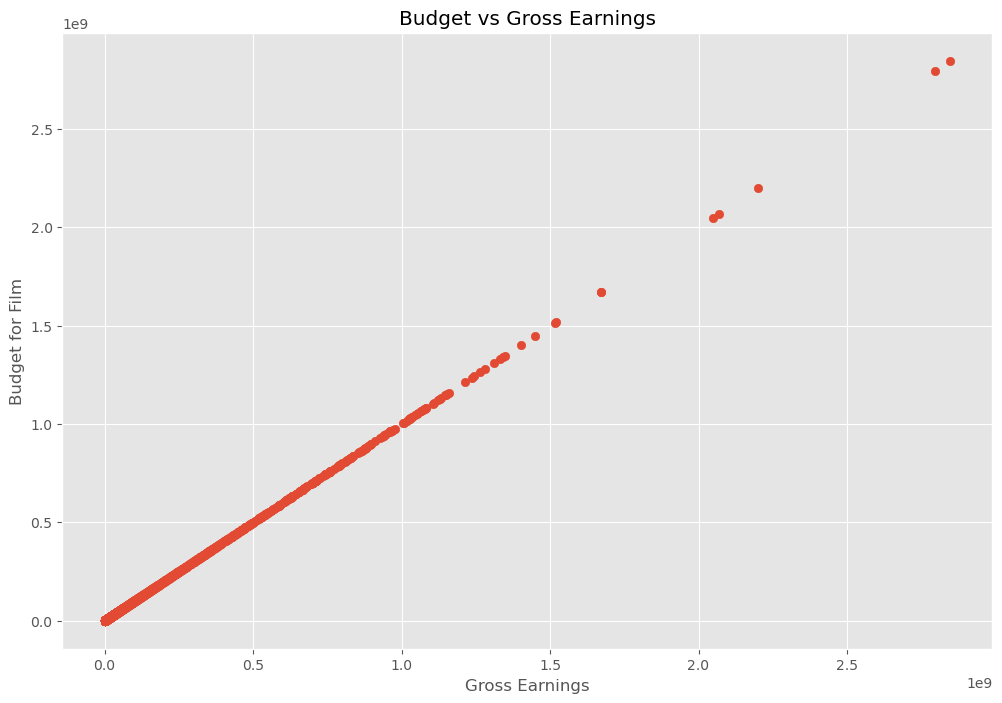

In [44]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [38]:
df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country     budget  \
0             Stephen King  Jack Nicholson  United Kingdom   46998772   
1  Henry De Vere Stacpoole  Brooke Shields   United States   58853106   
2           Leigh Brackett     Mark Hamill   United States  538375067   
3             Jim Abrahams     Robert Hays   United States   83453539   
4       Brian Doyle-Murray     Chevy Chase   United States   39846344   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<Axes: xlabel='budget', ylabel='gross'>

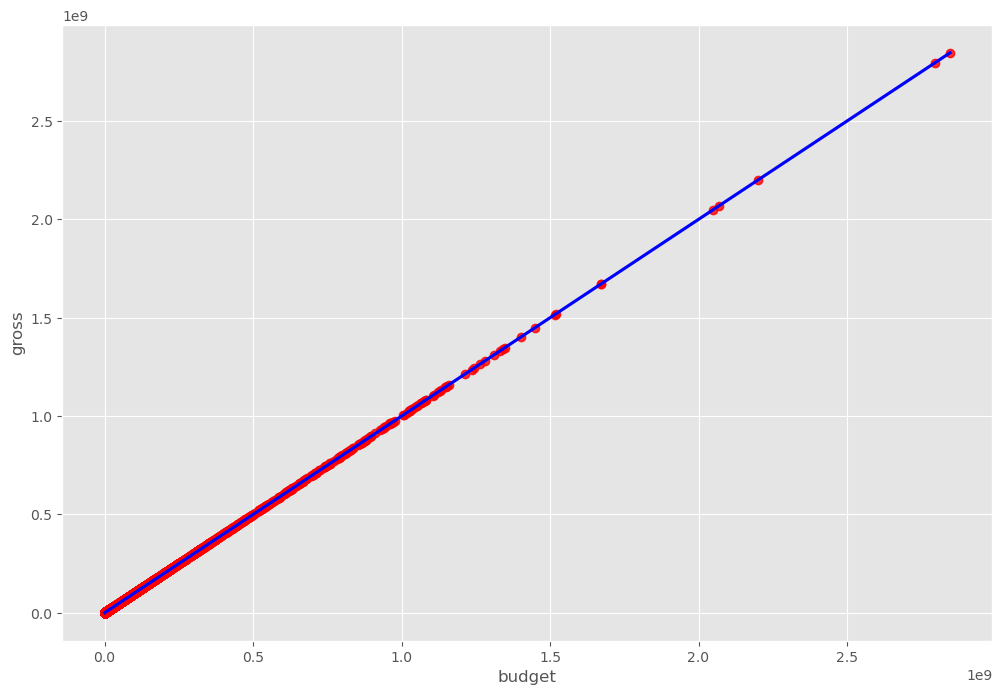

In [45]:
# Plotting budget vs gross 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [60]:
# Remove non-numeric values from columns
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')



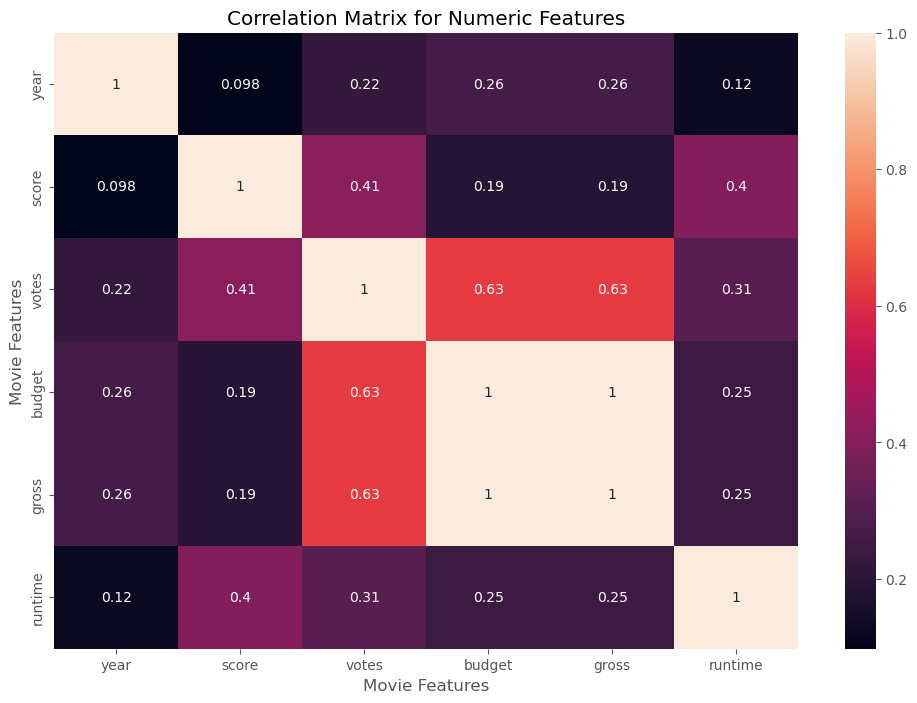

In [61]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()




plt.show()

In [52]:
# Looks at company
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country     budget  \
0             Stephen King  Jack Nicholson  United Kingdom   46998772   
1  Henry De Vere Stacpoole  Brooke Shields   United States   58853106   
2           Leigh Brackett     Mark Hamill   United States  538375067   
3             Jim Abrahams     Robert Hays   United States   83453539   
4       Brian Doyle-Murray     Chevy Chase   United States   39846344   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [62]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [63]:

df_numerized.corr()


name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186392   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.006989   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.095450   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.234297   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.261900   
released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.000519   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.186392   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.632834   
director     0.000260  1.000000  0.299067  0.039234  0.017490 -0.014916   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.022997   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.001129   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.095325   
budget       0.632834 -0.014916 -0.022997 -0.001129  0.095325  1.000000   
gross        0.632834 -0.014916 -0.022997 -0.001129  0.095325  1.000000   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.156745   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.245235   
yearcorrect  0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.001606   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.010392    -0.011725  
rating      -0.095450 -0.032943  0.062145     0.013475  
genre       -0.234297 -0.071067 -0.052711     0.028397  
year         0.261900 -0.010431  0.120811    -0.001562  
released     0.000519 -0.010474  0.000868     0.993694  
score        0.186392  0.001030  0.399451     0.040993  
votes        0.632834  0.133204  0.309212     0.017337  
director    -0.014916  0.004404  0.017624    -0.000105  
writer      -0.022997  0.005646 -0.003511    -0.002892  
star        -0.001129  0.012442  0.010174     0.015406  
country      0.095325  0.095548 -0.078412    -0.022277  
budget       1.000000  0.156745  0.245235     0.001606  
gross        1.000000  0.156745  0.245235     0.001606  
company      0.156745  1.000000  0.034402    -0.010726  
runtime      0.245235  0.034402  1.000000     0.000410  
yearcorrect  0.001606 -0.010726  0.000410     1.000000

In [67]:
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()



In [68]:
sorted_pairs = correlation_pairs.sort_values()

sorted_pairs

genre        gross         -0.234297
             budget        -0.234297
budget       genre         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
budget       rating        -0.095450
rating       gross         -0.095450
             budget        -0.095450
gross        rating        -0.095450
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
             country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
star         year          -0.027242
y

In [69]:
# High correlation

high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

votes        gross          0.632834
             budget         0.632834
gross        votes          0.632834
budget       votes          0.632834
yearcorrect  released       0.993694
released     yearcorrect    0.993694
name         name           1.000000
company      company        1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
runtime      runtime        1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          1.000000
gross        budget         1.000000
             gross          1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings , company has low correlation